## Classification of sklearn's _load_digits_ dataset

Use 10 times random forests and determine by average scores how many n-estimators work good enough.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = load_digits()
X = digits.data
Y = digits.target
Y = np.where(Y >= 5, 1, 0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

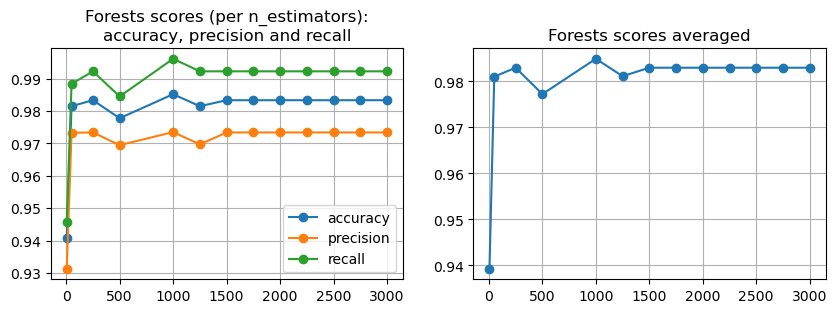

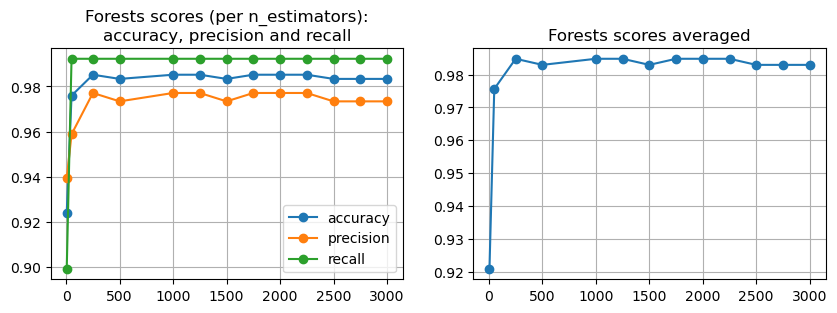

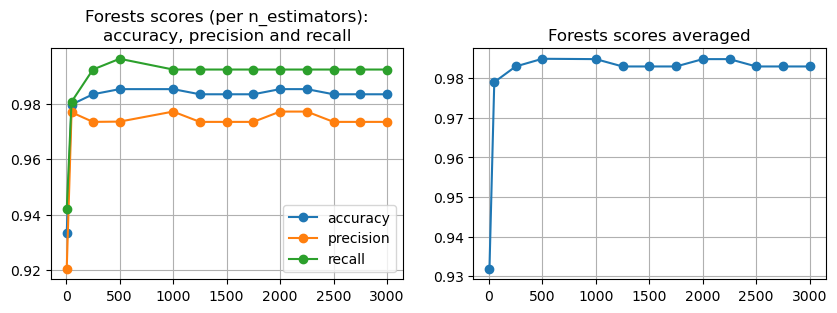

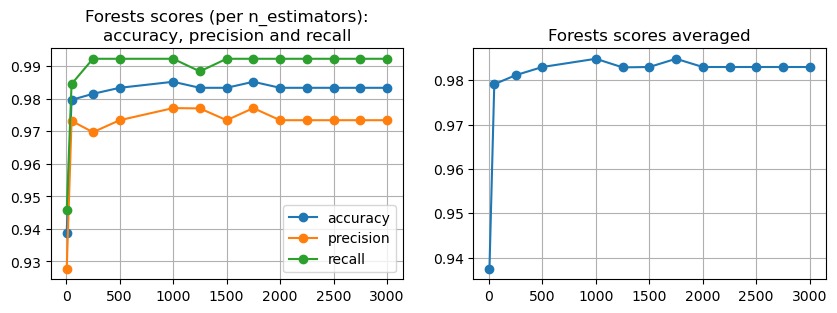

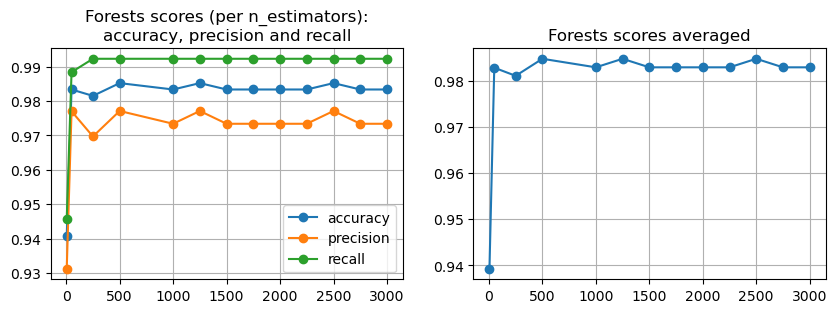

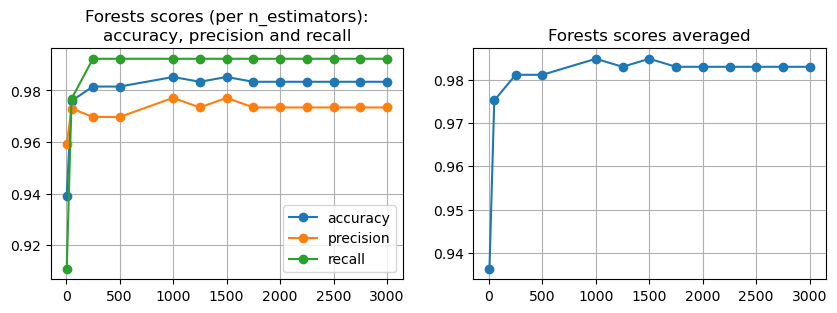



------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------

Average scores for 10 entries:




Average scores for 10 entries (without n_estimators=5):


In [4]:
def create_forest(n):
    return RandomForestClassifier(n_estimators = n).fit(X_train,y_train)

def get_forest_scores(forest):
    y_predRF = forest.predict(X_test)
    return [accuracy_score(y_test, y_predRF), precision_score(y_test,y_predRF), recall_score(y_test,y_predRF)]

def get_forests_scores(n_estimators):
    return (np.array([get_forest_scores(create_forest(n)) for n in n_estimators]), n_estimators)

def plot_forests_scores(data):
    forests_scores = data[0]
    n_estimators = data[1]

    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    plt.plot(n_estimators, forests_scores[:, 0], label = 'accuracy', marker = 'o')
    plt.plot(n_estimators, forests_scores[:, 1], label = 'precision', marker = 'o')
    plt.plot(n_estimators, forests_scores[:, 2], label = 'recall', marker = 'o')
    plt.legend()
    plt.title('Forests scores (per n_estimators):\naccuracy, precision and recall')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(n_estimators, [(score[0] + score[1] + score[2])/3 for score in forests_scores], marker = 'o')
    plt.title('Forests scores averaged')
    plt.grid()
    
    plt.show()
    return

#--------------------------------

n_estimators = [5, 50, 250, 500, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]

r = 10
average_forests_scores = np.zeros((len(n_estimators), 3))

for i in range(r):
    data = get_forests_scores(n_estimators)
    plot_forests_scores(data)
    for j in range(len(n_estimators)):
        average_forests_scores[j][0] += data[0][j][0]
        average_forests_scores[j][1] += data[0][j][1]
        average_forests_scores[j][2] += data[0][j][2]
        
print(f"\n\n------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------\n\nAverage scores for {r} entries:")
plot_forests_scores((average_forests_scores / r, n_estimators))
print(f"\n\nAverage scores for {r} entries (without n_estimators=5):")
plot_forests_scores((average_forests_scores[1:] / r, n_estimators[1:]))